### 4조 예습과제

#### 1. RNN

#### 1-1) RNN(Recurrent Neural Network)이 일반적인 신경망과 다른 점은 무엇인가요? RNN이 어떤 상황에서 더 유리할까요?(5점)

답 : RNN은 시간적 의존성과 시퀀스 데이터 처리에서 장점을 가지며, 일반 신경망은 독립적이고 비순차적인 데이터 처리에 적합합니다. RNN은 시퀀스 데이터의 패턴을 학습하고 시간에 따른 관계를 모델링할 수 있는 능력 덕분에 이러한 상황에서 더 유리합니다.

#### 1-2) RNN에서 한 시점에서의 출력은 다음 시점의 입력에 어떻게 영향을 주나요? 간단히 설명해보세요. (5점)

답: RNN에서는 한 시점의 상태가 다음 시점의 입력으로 전달됩니다. 이 방식으로 RNN은 시퀀스의 각 단계에서 이전의 정보(상태)를 고려하여 현재의 출력을 생성하고, 이를 통해 시퀀스의 시간적 의존성을 모델링합니다. 이러한 상태 전파와 피드백 루프는 RNN이 시퀀스 데이터의 패턴과 관계를 학습할 수 있게 합니다.

#### 1-3) 다음 코드에서 RNN 레이어를 정의하고 입력 데이터를 처리하는 코드를 완성해보세요.(5점)

In [1]:
import torch
import torch.nn as nn

# RNN 레이어 정의
rnn = nn.RNN(input_size=10, hidden_size=20, num_layers=1, batch_first=True)

# 임의의 입력 데이터 (배치 크기: 5, 시퀀스 길이: 3, 입력 크기: 10)
input_data = torch.randn(5, 3, 10)

# RNN을 사용하여 입력 데이터를 처리하세요.
output, hidden = rnn(input_data)
print(output)

tensor([[[-2.5271e-02,  7.3461e-02,  4.1219e-01, -2.6879e-01,  1.7918e-01,
           3.6037e-01, -2.1375e-01, -1.3746e-01, -1.8990e-01, -5.5091e-01,
          -3.8991e-01, -3.7591e-01, -4.9803e-01,  5.7251e-01,  5.1680e-01,
           1.1768e-01, -4.0666e-01, -5.1382e-01,  5.2920e-01, -4.4019e-01],
         [-5.4007e-01,  4.5885e-01,  5.7006e-01, -2.2922e-01, -1.7224e-01,
           3.2535e-02,  1.6038e-01,  4.2552e-01,  3.3435e-01, -6.8948e-01,
          -5.3946e-01, -5.0983e-01,  5.2568e-01,  6.0697e-01,  2.5593e-02,
          -7.1369e-01, -2.1328e-01,  4.0712e-01, -4.2243e-01, -4.0855e-01],
         [ 3.5072e-01, -9.2374e-02, -7.9859e-01,  8.4595e-01, -4.8792e-01,
          -3.0473e-01,  1.9589e-01, -1.1435e-01, -2.9880e-01,  6.8047e-01,
          -1.8621e-02, -4.0517e-01, -9.1407e-01,  1.2198e-01,  2.9505e-01,
          -1.9331e-01, -1.7636e-01,  4.3456e-01,  6.1018e-01, -3.0661e-01]],

        [[-9.5190e-02,  1.0555e-02,  3.5031e-01,  2.5298e-01, -5.0102e-01,
          -2.6054e-0

#### 1-4) ???를 채워넣고, 결과를 살펴보세요. (10점)

In [2]:
import torch
import torch.nn as nn

# RNN 모델 정의
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, hidden = self.rnn(x)
        out = self.fc(out[:, -1, :])  # RNN의 마지막 시점 출력에 대해 fully connected layer 적용
        return out

# 모델 생성
model = SimpleRNN(input_size=10, hidden_size=20, output_size=1)

# 임의의 입력 데이터 (배치 크기: 5, 시퀀스 길이: 3, 입력 크기: 10)
input_data = torch.randn(5, 3, 10)

# 모델 출력을 계산
output = model(input_data)
print(output)


tensor([[0.1271],
        [0.3147],
        [0.2264],
        [0.4177],
        [0.1363]], grad_fn=<AddmmBackward0>)


#### 2. LSTM(Long short-term Memory)

#### 2-1) 질문: LSTM(Long Short-Term Memory)은 RNN의 한 종류인데, LSTM이 RNN보다 더 나은 이유는 무엇인가요?(5점)

답 : LSTM은 장기 의존성 문제를 해결하기 위해 게이트 메커니즘을 사용하여 중요한 정보를 장기적으로 유지할 수 있습니다. 이로 인해 RNN보다 더 안정적이고 효과적으로 시퀀스 데이터를 학습할 수 있습니다.

#### 2-2) 질문: LSTM은 RNN과 달리 ’셀 상태(cell state)’와 ’은닉 상태(hidden state)’를 사용하는데, 이 둘의 역할은 무엇인가요?(5점)

답 : 셀 상태는 장기적인 정보를 유지하며, 은닉 상태는 현재 시점의 정보와 출력을 포함합니다. 셀 상태는 장기 기억을, 은닉 상태는 단기 기억과 예측을 담당합니다.

#### 2-3) 질문: 다음 코드에서 LSTM 레이어를 정의하고, 입력 데이터를 처리하는 코드를 완성해보세요.(5점)

In [3]:
import torch
import torch.nn as nn

# LSTM 레이어 정의
lstm = nn.LSTM(input_size=10, hidden_size=20, num_layers=1, batch_first=True)

# 임의의 입력 데이터 (배치 크기: 5, 시퀀스 길이: 3, 입력 크기: 10)
input_data = torch.randn(5, 3, 10)

# LSTM을 사용하여 입력 데이터를 처리
output, (hidden, cell) = lstm(input_data)

print(output)


tensor([[[-0.0529,  0.0650,  0.0245, -0.1062, -0.0228, -0.0107,  0.0047,
          -0.0751, -0.2139, -0.0205, -0.0206, -0.0517, -0.0144,  0.0841,
          -0.0274, -0.0103, -0.1062, -0.0676,  0.0394, -0.0176],
         [ 0.1751,  0.1090, -0.0928, -0.0713, -0.0421,  0.0805,  0.1724,
          -0.0373, -0.0012, -0.0390,  0.0472, -0.0042,  0.2440,  0.1516,
          -0.0728,  0.0480, -0.0181, -0.2843, -0.1620, -0.1396],
         [ 0.0717, -0.0083, -0.0728, -0.0576,  0.0960, -0.0367,  0.1368,
          -0.0407, -0.1091, -0.0573,  0.0049,  0.0719,  0.2131,  0.0160,
           0.0286,  0.0357, -0.0890, -0.2217, -0.0092, -0.0689]],

        [[-0.1740, -0.1363, -0.0824, -0.1571,  0.1186, -0.0082,  0.0579,
          -0.0063, -0.0246,  0.0420, -0.0224, -0.1891, -0.0305,  0.0200,
           0.0519,  0.0176, -0.1224, -0.0170, -0.0300, -0.0043],
         [-0.0771,  0.0322, -0.0056, -0.0613,  0.2000, -0.1568, -0.0014,
           0.0362, -0.1086,  0.0894,  0.0996, -0.0419,  0.1539,  0.1421,
        

#### 2-4) ???를 채워넣고, 결과를 지켜보세요.(10점)

In [4]:
import torch
import torch.nn as nn

# LSTM 모델 정의
class SimpleLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, (hidden, cell) = self.lstm(x)
        out = self.fc(out[:, -1, :])  # LSTM의 마지막 타임스텝 출력에 대해 fully connected layer 적용
        return out

# 모델 생성
model = SimpleLSTM(input_size=10, hidden_size=20, output_size=1)

# 임의의 입력 데이터 (배치 크기: 5, 시퀀스 길이: 3, 입력 크기: 10)
input_data = torch.randn(5, 3, 10)

# 모델 출력을 계산
output = model(input_data)
print(output)


tensor([[-0.0771],
        [-0.1141],
        [-0.0747],
        [-0.1302],
        [-0.0328]], grad_fn=<AddmmBackward0>)


### 5조 예습과제

#### 1-1. Attention 메커니즘의 기본 아이디어를 설명하고, 어떤 문제를 해결하기 위해 도입되었는지 설명하세요. [10점]

답 : Attention 메커니즘은 입력 시퀀스의 각 부분에 가중치를 부여해, 중요한 정보를 더 강조하며 모델이 학습하도록 돕습니다. 이는 RNN의 긴 시퀀스 처리에서 발생하는 정보 손실과 장기 의존성 문제를 해결하기 위해 도입되었습니다.

#### 1-2. 아래의 빈칸을 채우시오. [7점]
Attention은 중요한 단어에 가중치 부여하여 출력에 바로 전달하는 기법이다.

#### 1-3. Self-Attention 메커니즘이 작동하는 과정을 단계 별로 나타낸 것입니다. 순서대로 나열하세요.   [8점]
 

  
a) Query, Key, Value 생성: 입력 시퀀스에서 Query, Key, Value 벡터를 생성합니다.  
b) 가중치 적용: 계산된 유사도를 소프트맥스 함수를 통해 가중치로 변환합니다.   
c) 유사도 계산: Query와 모든 Key 간의 유사도를 계산합니다.  
d) Weighted Sum: 각 Value 벡터에 가중치를 곱한 후, 이를 합산하여 최종 출력을 생성합니다.  


답 : acbd

#### 2-1. Transformer 모델의 기본 구조를 설명하고, Encoder와 Decoder의 역할을 구분하여 설명하세요.  [7점]


답 : 
기본 구조 - Transformer 모델은 인코더(Encoder)와 디코더(Decoder)로 구성된 두 가지 주요 부분으로 이루어져 있습니다. 이 모델은 병렬 처리 능력이 뛰어나며, 각 레이어에 셀프 어텐션(Self-Attention)과 피드포워드 네트워크를 포함합니다.

Encoder: 인코더는 입력 시퀀스를 받아 각 단어의 표현을 생성합니다. 각 인코더 레이어는 셀프 어텐션 메커니즘을 통해 단어 간의 관계를 파악하고, 피드포워드 네트워크를 통해 정보를 처리하여 다음 레이어로 전달합니다. 최종적으로, 인코더는 입력 시퀀스에 대한 심층적인 표현을 생성합니다.

Decoder: 디코더는 인코더에서 생성된 표현과 현재까지 생성된 출력 시퀀스를 바탕으로 다음 단어를 예측합니다. 각 디코더 레이어는 셀프 어텐션과 인코더-디코더 어텐션을 통해 이전 출력과 인코더의 출력을 결합하여, 피드포워드 네트워크를 통해 다음 단어를 예측하는 데 필요한 정보를 생성합니다.

#### 2-2. 다음은 트랜스포머의 구조이다. 빈칸을 채우시오. [7점]
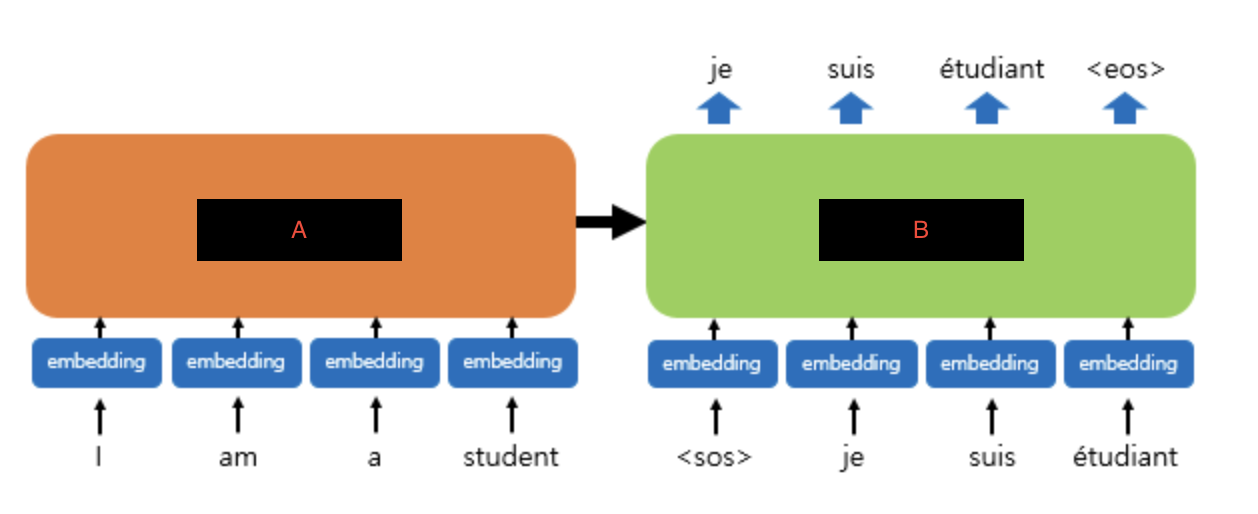

답 : 

#### 2-3. 아래는 여러번의 어텐션을 병렬로 사용하는 multihead attention의 구조를 표현한 그림과, 한 예시로 병렬 어텐션을 표현한 그림이다.     
#### 주어진 예시에서 병렬 어텐션 헤드의 개수를 구하고, multihead attention의 효과로 각 연산과정의 몇 배가 필요한지 구하시오. [10점]
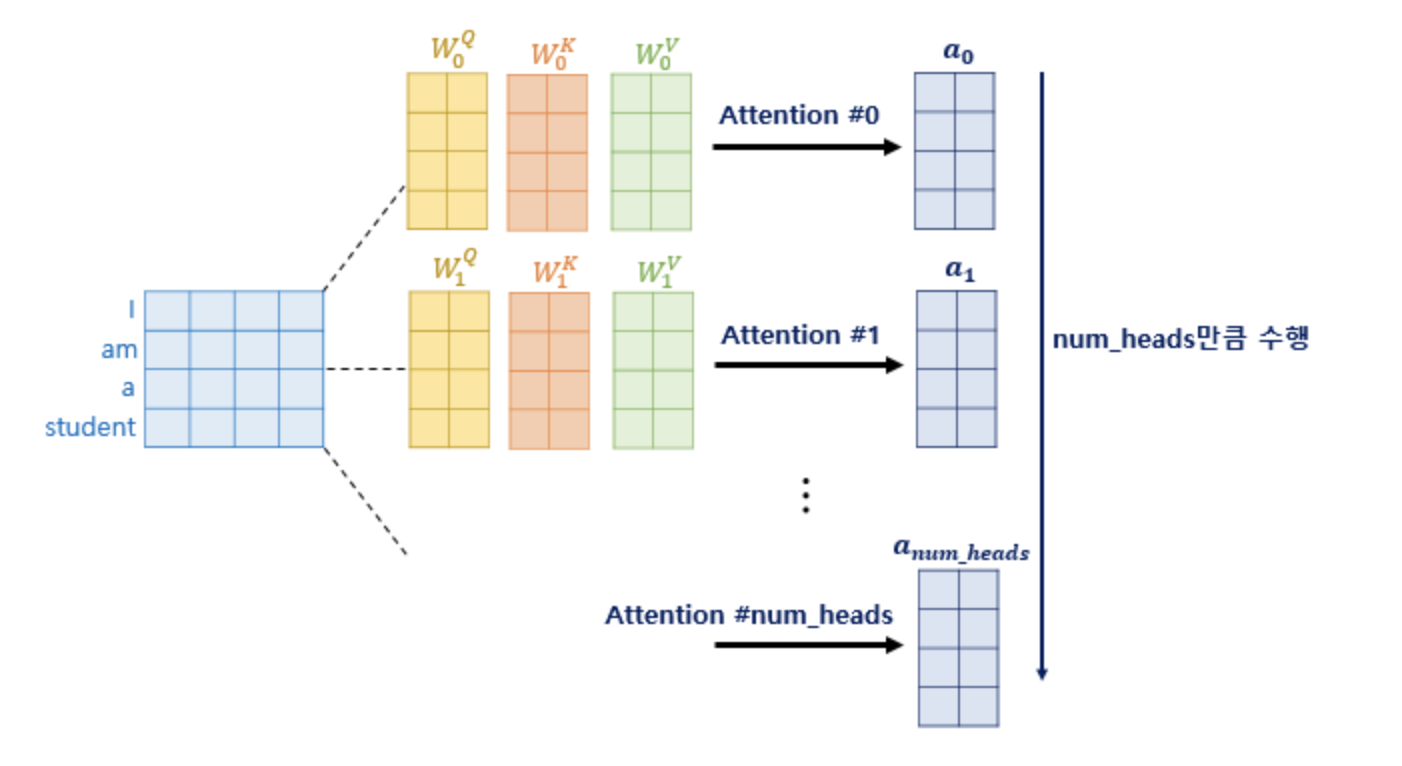
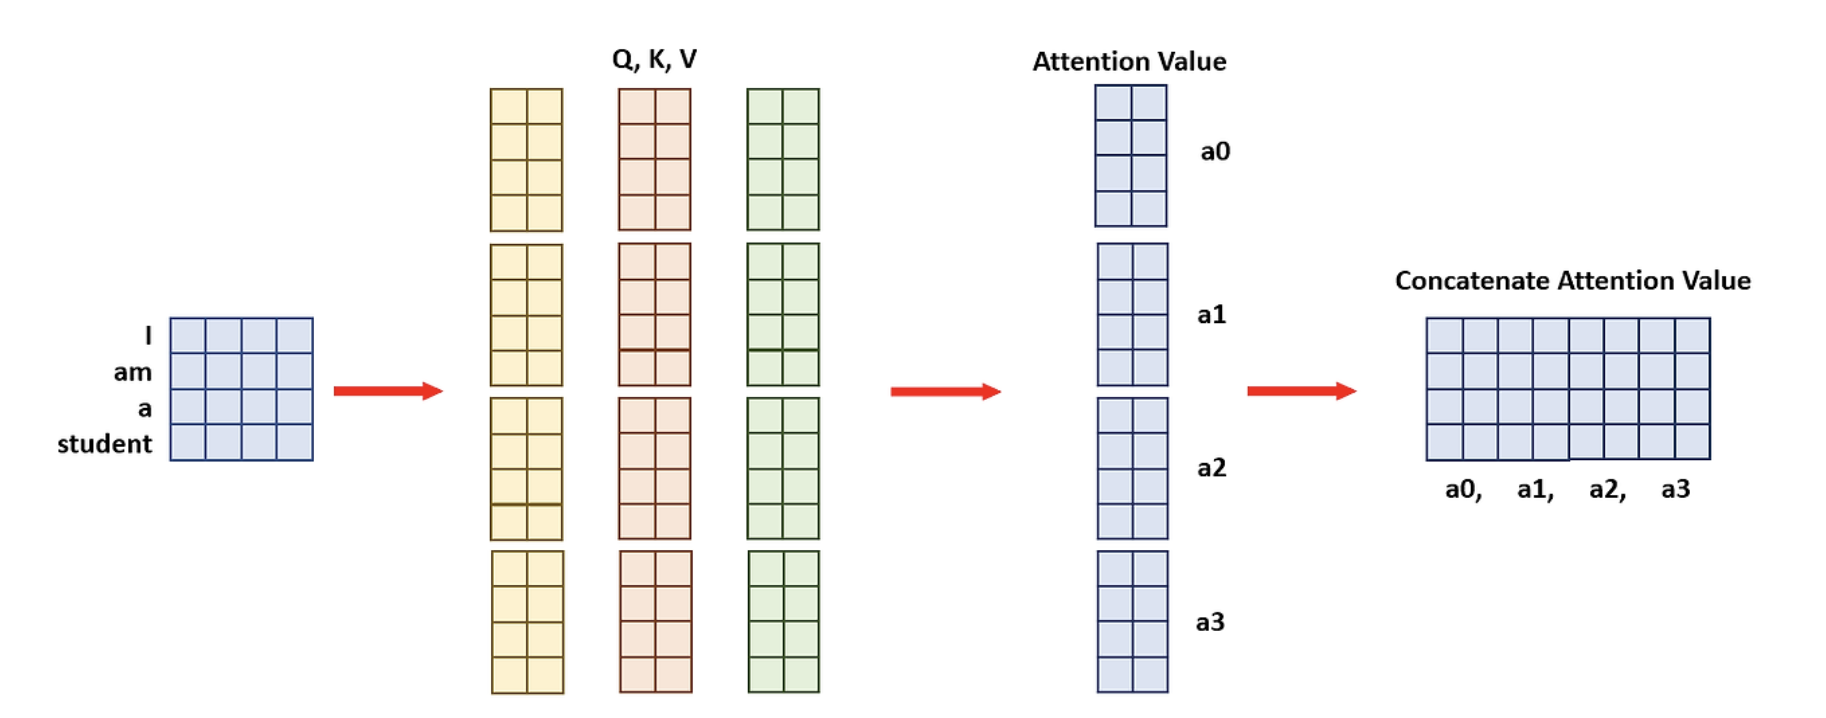

답 : 

#### 2-4.트랜스포머의 사용 분야에 대해 간단히 서술하시오.  [4점]

답 : 트랜스포머는 자연어 처리(NLP) 분야에서 번역, 요약, 질의 응답 등 다양한 언어 모델링 작업에 널리 사용됩니다. 또한, 이미지 처리, 시퀀스 예측, 음성 인식, 그리고 단백질 구조 예측과 같은 비언어적 데이터 처리에서도 성공적으로 적용되고 있습니다.

In [ ]:
## 1-1. Attention 메커니즘의 기본 아이디어를 설명하고, 어떤 문제를 해결하기 위해 도입되었는지 설명하세요. [10점]

답 : 

## 1-2. 아래의 빈칸을 채우시오. [7점]
Attention은 중요한 단어에 __하여 __에 바로 전달하는 기법이다.

## 1-3. Self-Attention 메커니즘이 작동하는 과정을 단계 별로 나타낸 것입니다. 순서대로 나열하세요.   [8점]
 

  
a) Query, Key, Value 생성: 입력 시퀀스에서 Query, Key, Value 벡터를 생성합니다.  
b) 가중치 적용: 계산된 유사도를 소프트맥스 함수를 통해 가중치로 변환합니다.   
c) 유사도 계산: Query와 모든 Key 간의 유사도를 계산합니다.  
d) Weighted Sum: 각 Value 벡터에 가중치를 곱한 후, 이를 합산하여 최종 출력을 생성합니다.  


답 : 

## 2-1. Transformer 모델의 기본 구조를 설명하고, Encoder와 Decoder의 역할을 구분하여 설명하세요.  [7점]


답: 
기본구조 - 
  
Encoder: 
Decoder: 

## 2-2. 다음은 트랜스포머의 구조이다. 빈칸을 채우시오. [7점]
![image.png](attachment:654c1b6e-a124-461e-9437-e890667eb066.png)

답 : 

## 2-3. 아래는 여러번의 어텐션을 병렬로 사용하는 multihead attention의 구조를 표현한 그림과, 한 예시로 병렬 어텐션을 표현한 그림이다.     
## 주어진 예시에서 병렬 어텐션 헤드의 개수를 구하고, multihead attention의 효과로 각 연산과정의 몇 배가 필요한지 구하시오. [10점]
![image.png](attachment:915ecc48-afa5-4824-8262-de9eba2f5b71.png)
![image.png](attachment:ce048c0f-1968-4cb4-a56c-6e3d1c65b7cb.png)

답 : 

## 2-4.트랜스포머의 사용 분야에 대해 간단히 서술하시오.  [4점]

답 : 